Title: Review of Bayesian Decision Theory
Author: Thomas Breuel
Institution: UniKL

Bayesian Decision Making
=======================

(Joint Density)

In decision problems, we have items with:

- some measurable property/properties $x\in R^n$
- some class $\omega\in \{0,...,C\}$

These are described by a _joint density_ $P(\omega,x)$.

(Conditional Probabilities)

The _class conditional density_ is $p(x|\omega) = P(\omega,x) / P(\omega)$.

The _posterior distribution_ is $P(\omega|x) = P(\omega,x) / p(x)$.

(Bayes Rule)

These two combine into _Bayes Rule_:

$$p(x|\omega) P(\omega) = P(\omega|x) p(x)$$

or

$$P(\omega|x) = \frac{p(x|\omega) P(\omega)}{p(x)}$$

(Optimal Decision Rule)

The _optimal decision rule_ under a zero-one loss function is 

$D(x) = \arg\max_\omega P(\omega|x)$

(Justification for Optimal Decision Rule)

The reason for this is that the probability of error for each $x$ is

$$P(\hbox{error}|x) = 1 - \max_\omega P(\omega|x)$$ 

and the total error is given by:

$$P(\hbox{error}) = \int P(\hbox{error}|x) p(x) dx $$

In [1]:


from scipy import stats
from scipy.stats import norm

(probability density functions)

We previously computed with distributions by sampling from them. Let's compute now directly with the probability density functions, like $p(x)$.

Remember:

$$ p(x) \geq 0 $$

$$ \int p(x) dx = 1 $$

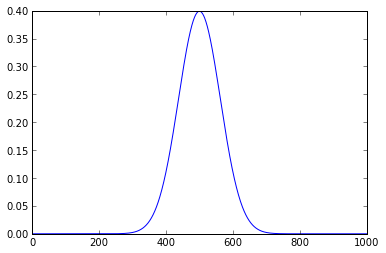

In [3]:
# normal density
x = linspace(-8.0,8.0,1000)
plot(norm.pdf(x))

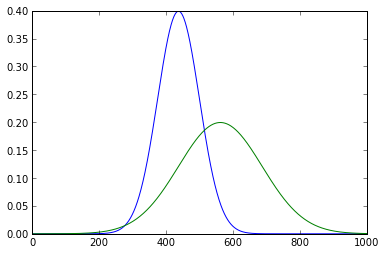

In [3]:
# Class Conditional Densities
x = linspace(-8.0,8.0,1000)
p_x_given_1 = norm.pdf(x,loc=-1.0)
p_x_given_2 = norm.pdf(x,loc=1.0,scale=2.0)
plot(p_x_given_1); plot(p_x_given_2)

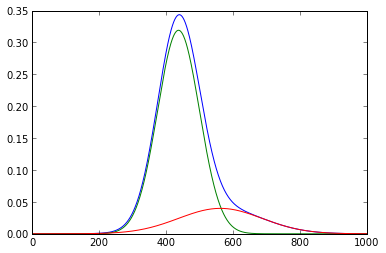

In [4]:
# Priors and Sample Distribution
p_1 = 0.8
p_2 = 0.2
p_x = p_x_given_1 * p_1 + p_x_given_2 * p_2
plot(p_x); plot(p_x_given_1*p_1); plot(p_x_given_2*p_2)

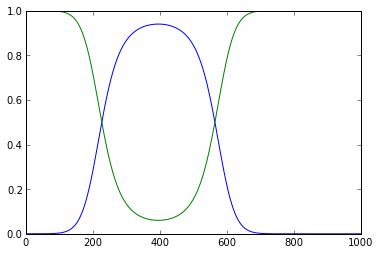

In [5]:
# Conditional Distributions
p_1_given_x = p_x_given_1 * p_1 / p_x
p_2_given_x = p_x_given_2 * p_2 / p_x
plot(p_1_given_x); plot(p_2_given_x)

(Density vs Conditional Distributions)

A _density_ is a non-negative function $f:R^n\rightarrow R$ such that $\int f(x) dx = 1$.

A _conditional distribution_ is a function $f:R^n\rightarrow R^c$ such that $\sum_i f_i(x) = 1$ for all $x$.


0.117715838421


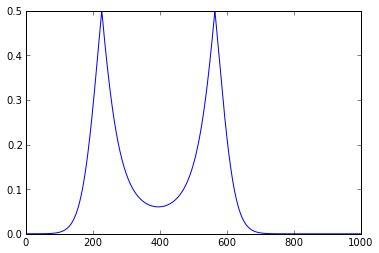

In [7]:
# Error at each Point
p_error_given_x = 1-maximum(p_1_given_x,p_2_given_x)
plot(p_error_given_x)
print sum(p_error_given_x*p_x)/sum(p_x)

# 2D Example

Some preliminaries...



In [19]:
xs,ys = meshgrid(linspace(-4.0,4.0,200),linspace(-4.0,4.0,200))
xys = c_[xs.ravel(),ys.ravel()]

def mvpdf(x,mu=zeros(2),sigma=eye(2)):
    return ((2*pi)**len(mu)*det(sigma))**-.5 * exp(-0.5*dot(x-mu,dot(inv(sigma),x-mu)))

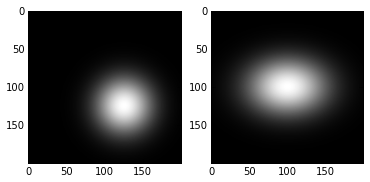

In [20]:
# class conditional densities
p_x_given_1 = array([mvpdf(x,mu=array([1,1.0])) for x in xys]).reshape(xs.shape)
p_x_given_2 = array([mvpdf(x,sigma=diag([2.0,1])) for x in xys]).reshape(xs.shape)
subplot(121); imshow(p_x_given_1,cmap=cm.gray)
subplot(122); imshow(p_x_given_2,cmap=cm.gray)

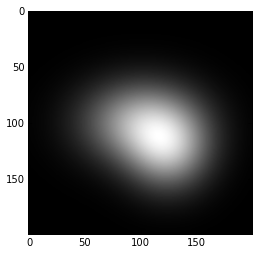

In [26]:
# Priors and Sample Distribution
p_1 = 0.4
p_2 = 0.6
p_x = p_x_given_1 * p_1 + p_x_given_2 * p_2
imshow(p_x,cmap=cm.gray)

(0.0, 0.1)

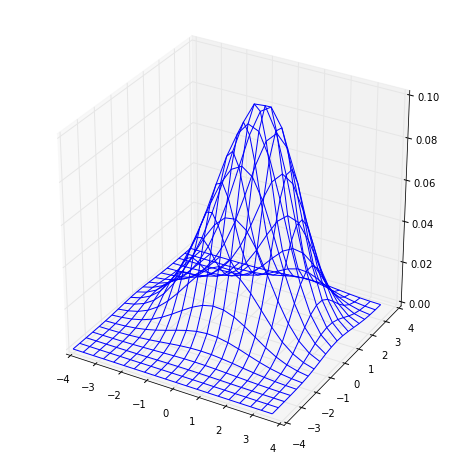

In [33]:
# sample distribution in 3D
from mpl_toolkits.mplot3d import Axes3D
subplots(1,1,figsize=(8,8))
ax = gcf().add_subplot(111,projection='3d')
ax.plot_wireframe(xs[::10,::10],ys[::10,::10],p_x[::10,::10])
ax.set_zlim3d(0.0,0.1)

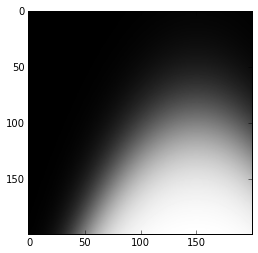

In [32]:
# conditional distributions
p_1_given_x = p_x_given_1 * p_1 / p_x
p_2_given_x = p_x_given_2 * p_2 / p_x
imshow(p_1_given_x,cmap=cm.gray)

(0.0, 1.0)

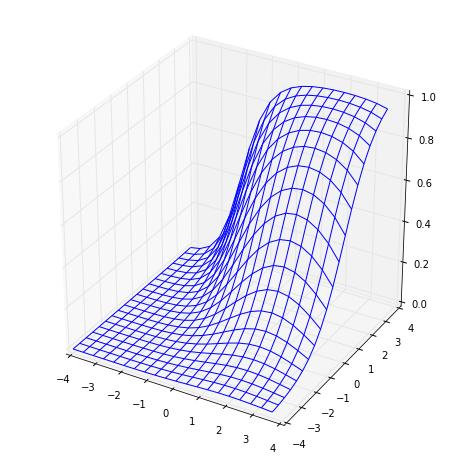

In [31]:
# conditional distribution in 3D
from mpl_toolkits.mplot3d import Axes3D
subplots(1,1,figsize=(8,8))
ax = gcf().add_subplot(111,projection='3d')
ax.plot_wireframe(xs[::10,::10],ys[::10,::10],p_1_given_x[::10,::10])
ax.set_zlim3d(0.0,1.0)

# Bayesian Decision Theory

(zero-one loss)

Above, we used a _zero-one loss_.  That is, we used a cost of 1 for an error and
a cost of 0 when there was no error.

In the general case, we have a 2D table of costs, saying how much of a penalty
we pay if the decision is one thing and the state of nature is another thing.

                   state 0     state 1

        action 0      0          1

        action 1      1          0

(other losses)

These costs need not be at all like this.  In fact, costs frequently are
asymmetric.

                   state 0     state 1

        action 0      0         10

        action 1   1000          0


We call this matrix the _loss matrix_ and write the elements
as $\lambda_{ij}$, or a function $\Lambda(\alpha,\omega)$, which
is the cost of taking action $\alpha$ when the state of nature
is $\omega$.

(relationship to game theory)

We will see these kinds of matrices much more later on when we talk about
_game theory_.

- In Bayesian decision theory, nature picks a state at random and we take an action in response.
- In game theory, we need to make a decision and then someone else is going to make a decision in response.

(risk = expected loss)

In general, we want to minimize expected loss. 
We call expected loss the _risk_ of a decision.

Just like there are conditional probabilities, there
are conditional risks.

$$R(\alpha_1|x) = \lambda_{11} P(\omega_1|x) + \lambda_{12} P(\omega_2|x)$$

(minimizing expected loss)

We want to minimize overall risk, and for that we minimize risk at each point $x$.
To do that, we choose action $\alpha_1$ if the risk of that action is lower than
action $\alpha_2$ and vice versa.

\begin{eqnarray}
R(\alpha_1|x) & \leq & R(\alpha_2|x) \\\
\lambda_{11} P(\omega_1|x) + \lambda_{12} P(\omega_2|x) & \leq & 
\lambda_{21} P(\omega_1|x) + \lambda_{22} P(\omega_2|x)\\\
(\lambda_{12}-\lambda_{22}) P(\omega_2|x) & \leq &
(\lambda_{21}-\lambda_{11}) P(\omega_1|x) \\\
\end{eqnarray}

(likelihood ratio vs risk)

With _Bayes Rule_, we can transform this into a decision rule based on the likelihood ratio:

\begin{equation}
\frac{p(x|\omega_1)}{p(x|\omega_2)} \geq
\frac{\lambda_{12}-\lambda_{22}}{\lambda_{21}-\lambda_{11}} 
\frac{P(\omega_2)}{P(\omega_1)}
\end{equation}